In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data from CSV file
data = pd.read_csv('medical_raw_data.csv')

# Display column data types and example values
data.info()
data.head()

In [2]:
# Check for missing values
data.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [3]:
# Check for duplicate values of any rows
data.duplicated().any()

False

In [4]:
# Check for duplicate values based on customer_id unique key
data.duplicated('Customer_id').any()

False

In [5]:
# check if convertible from categorical to numeric
data['Complication_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

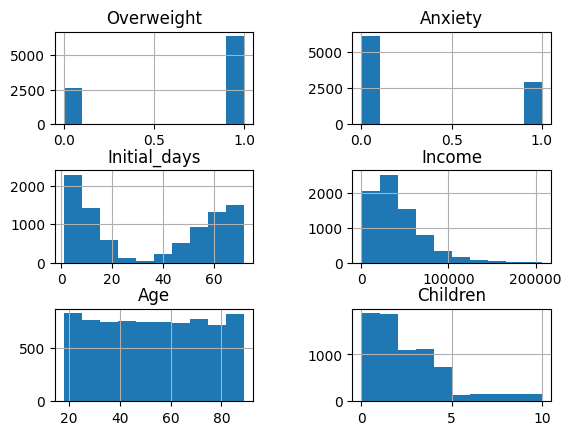

In [6]:
# Create histogram of columns with null values
data[['Overweight','Anxiety','Initial_days','Soft_drink','Income', 'Age', 'Children']].hist()
# Add space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
# Show the plot
plt.show()

<Axes: >

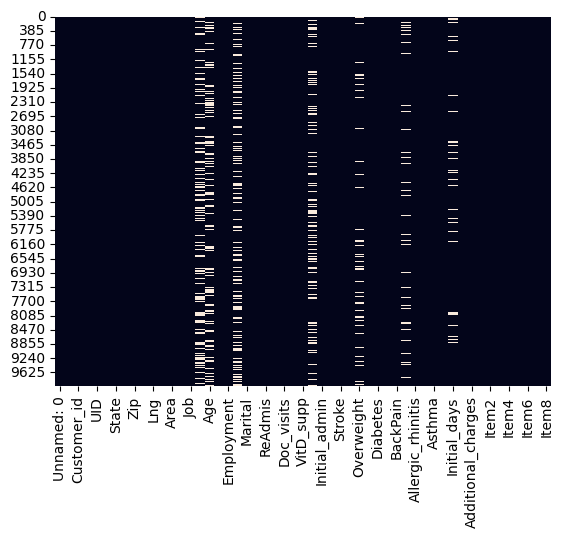

In [7]:
# heatmap of null values to better visualize
sns.heatmap(data.isnull(), cbar=False)

<Axes: >

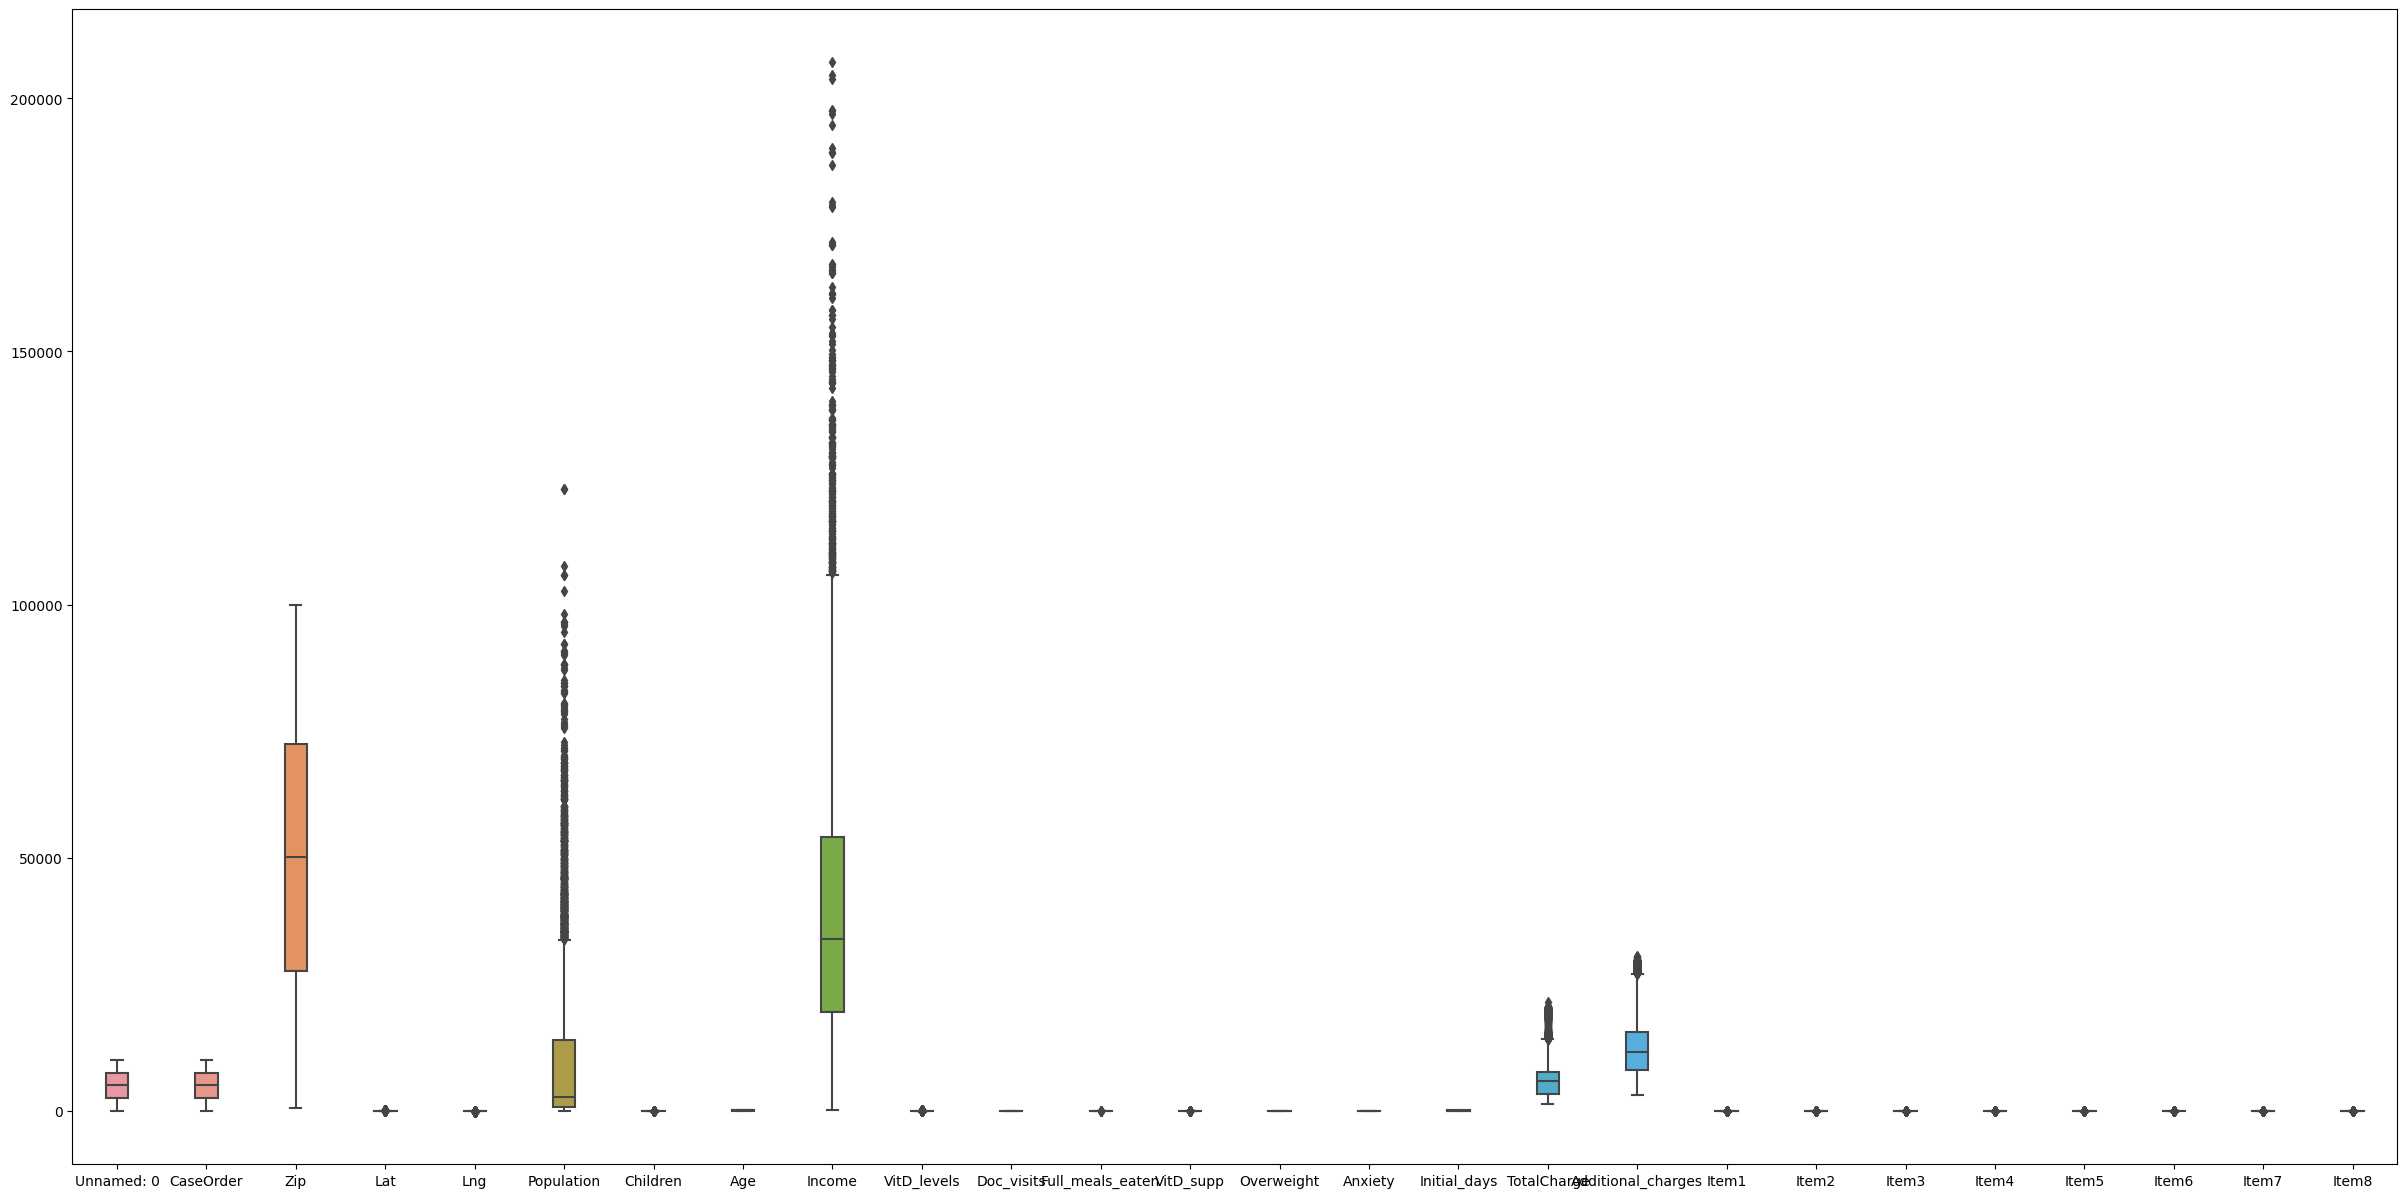

In [8]:
# generate boxplot outliers of numeric variables
med_data=data.select_dtypes(include=[np.number])

plt.subplots(figsize=(30,15))
sns.boxplot(data=med_data, width=0.25, saturation=0.75, dodge=True, fliersize=5)

<Axes: >

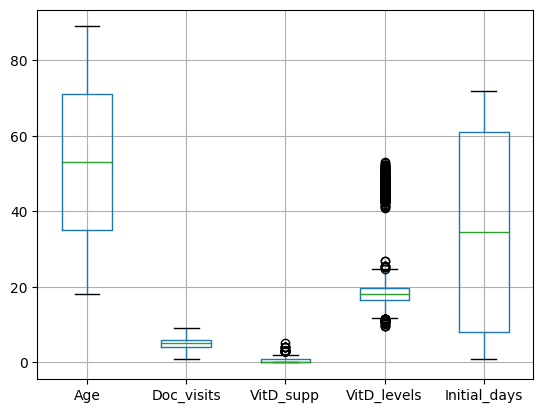

In [9]:
# check for outliers with smaller group of variables
data.boxplot(column=['Age', 'Doc_visits', 'VitD_supp', 'VitD_levels', 'Initial_days'])

<Axes: >

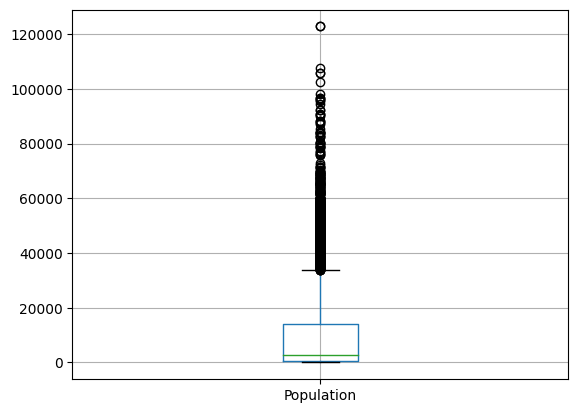

In [10]:
data.boxplot(column=['Population'])

<Axes: >

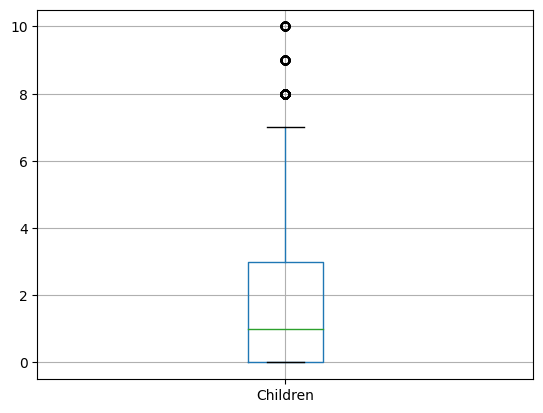

In [11]:
data.boxplot(column=['Children'])

<Axes: >

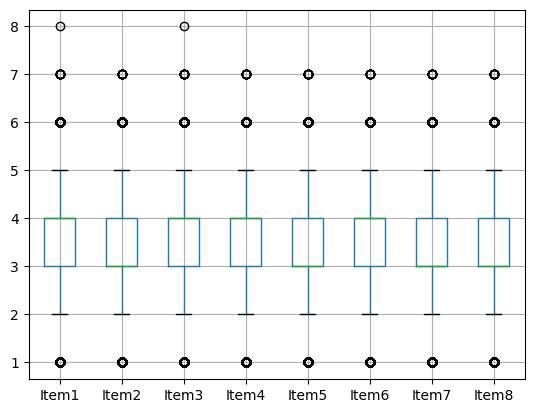

In [12]:
data.boxplot(column=['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

<Axes: >

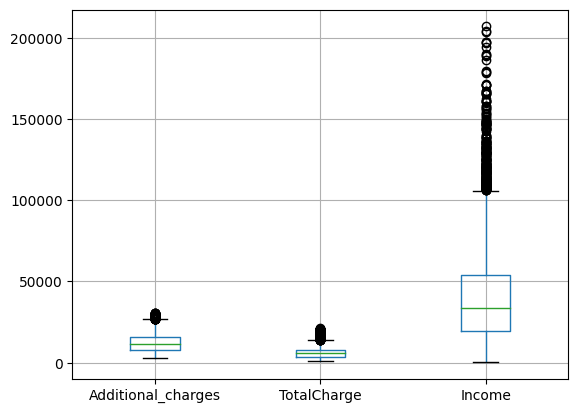

In [13]:
data.boxplot(column=['Additional_charges', 'TotalCharge', 'Income'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [15]:
# remove unused columns
data.drop([data.columns[0],'Interaction', 'UID'], axis=1, inplace=True)
data.head()

,CaseOrder,Customer_id,City,State,County,Zip,Lat,Lng,Population,Area,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [16]:
# get null value counts:
data.isnull().sum()

CaseOrder                0
Customer_id              0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
Allergic_rhinitis        0
Reflux_esophagitis       0
A

In [17]:
# fill in null children vals to 0 and change type to int64
data['Children']= data['Children'].fillna(0)

# average of age column to fill in null values and change type to int64
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Age'] = data['Age'].astype('int64')
# outliers shown above in boxplot so filling in with median of income column
data['Income']=data['Income'].fillna(data['Income'].median())
# filling in null soft_drink values with No
data['Soft_drink']=data['Soft_drink'].fillna('No')
# filling in null overweight values with 0
data['Overweight']=data['Overweight'].fillna(0)
# filling in null anxiety values with 0
data['Anxiety']=data['Anxiety'].fillna(0)
data['Initial_days']=data['Initial_days'].fillna(data['Initial_days'].mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   City                10000 non-null  object 
 3   State               10000 non-null  object 
 4   County              10000 non-null  object 
 5   Zip                 10000 non-null  int64  
 6   Lat                 10000 non-null  float64
 7   Lng                 10000 non-null  float64
 8   Population          10000 non-null  int64  
 9   Area                10000 non-null  object 
 10  Timezone            10000 non-null  object 
 11  Job                 10000 non-null  object 
 12  Children            10000 non-null  float64
 13  Age                 10000 non-null  int64  
 14  Education           10000 non-null  object 
 15  Employment          10000 non-null  object 
 16  Incom

<Axes: >

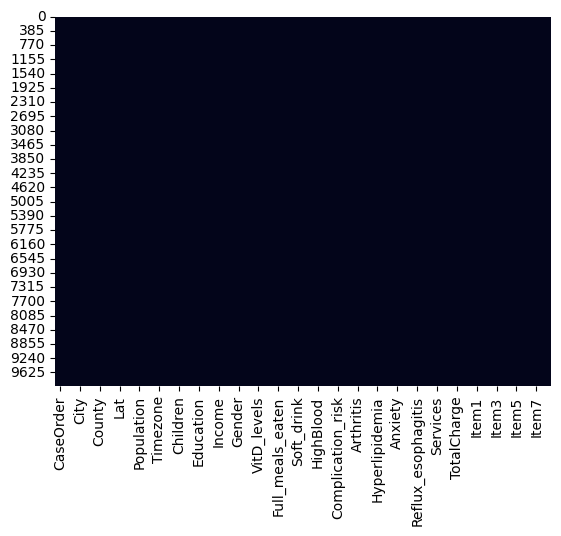

In [18]:
# verify removed null values
data.isnull().sum()
# generate a heatmap of the now filled-in null values
sns.heatmap(data.isnull(), cbar=False)

In [19]:
# map categorical data to numeric values
data['ReAdmis'] = data['ReAdmis'].map({'Yes': 1, 'No': 0})
data['Arthritis'] = data['Arthritis'].map({'Yes': 1, 'No': 0})
data['Asthma'] = data['Asthma'].map({'Yes': 1, 'No': 0})
data['Soft_drink'] = data['Soft_drink'].map({'Yes': 1, 'No': 0, 'NA': 0})
data['Diabetes'] = data['Diabetes'].map({'Yes': 1, 'No': 0})
data['Allergic_rhinitis'] = data['Allergic_rhinitis'].map({'Yes': 1, 'No': 0})
data['BackPain'] = data['BackPain'].map({'Yes': 1, 'No': 0})
data['Stroke'] = data['Stroke'].map({'Yes': 1, 'No': 0})
data['HighBlood'] = data['HighBlood'].map({'Yes': 1, 'No': 0})
data['Hyperlipidemia'] = data['Hyperlipidemia'].map({'Yes': 1, 'No': 0})
data['Reflux_esophagitis'] = data['Reflux_esophagitis'].map({'Yes': 1, 'No': 0})
data['Complication_risk'] = data['Complication_risk'].map({'High': 3, 'Medium': 2, 'Low': 1})

In [20]:
# Convert the categorical columns to integer types
data['ReAdmis'] = data['ReAdmis'].astype('int64')
data['Overweight'] = data['Overweight'].astype(int)
data['Asthma'] = data['Asthma'].astype('int64')
data['Anxiety'] = data['Anxiety'].astype('int64')
data['Diabetes'] = data['Diabetes'].astype('int64')
data['Allergic_rhinitis'] = data['Allergic_rhinitis'].astype('int64')
data['BackPain'] = data['BackPain'].astype('int64')
data['Stroke'] = data['Stroke'].astype('int64')
data['HighBlood'] = data['HighBlood'].astype('int64')
data['Hyperlipidemia'] = data['Hyperlipidemia'].astype('int64')
data['Reflux_esophagitis'] = data['Reflux_esophagitis'].astype('int64')
data['Complication_risk'] = data['Complication_risk'].astype('int64')
# Zip should be a string as calculations are not needed
data['Zip'] = data['Zip'].astype(str)

In [21]:
# round currency variables to 2 decimals, intial_days to 1 decimal
data['TotalCharge'] = data['TotalCharge'].round(decimals=2)
data['Additional_charges'] = data['Additional_charges'].round(decimals=2)
data['Initial_days'] = data['Initial_days'].round(decimals=1)

In [22]:
# rename unclear survey response columns
survey_col_names = {
    'Item1': 'Timely_admis',
    'Item2': 'Timely_treat',
    'Item3': 'Timely_visits',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Hours_treat',
    'Item7': 'Courteous_staff',
    'Item8': 'Active_listening'
}

data = data.rename(columns=survey_col_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   City                10000 non-null  object 
 3   State               10000 non-null  object 
 4   County              10000 non-null  object 
 5   Zip                 10000 non-null  object 
 6   Lat                 10000 non-null  float64
 7   Lng                 10000 non-null  float64
 8   Population          10000 non-null  int64  
 9   Area                10000 non-null  object 
 10  Timezone            10000 non-null  object 
 11  Job                 10000 non-null  object 
 12  Children            10000 non-null  float64
 13  Age                 10000 non-null  int64  
 14  Education           10000 non-null  object 
 15  Employment          10000 non-null  object 
 16  Incom

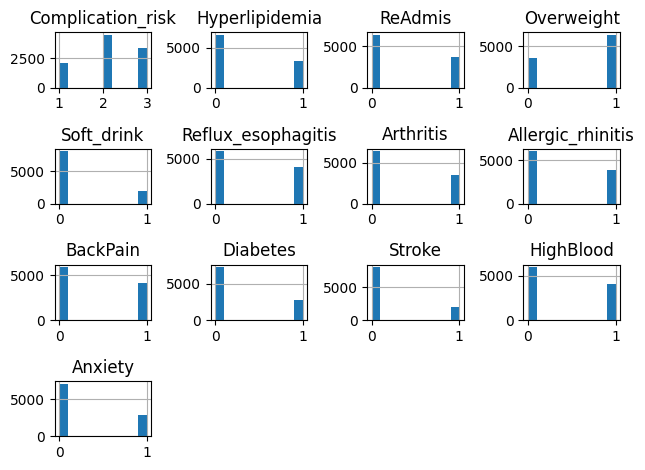

In [23]:
# verify changes were made
data.info()
data.head()

# visualize variables after filling in values
data[['Complication_risk', 'Hyperlipidemia', 'ReAdmis', 'Overweight', 'Soft_drink', 'Reflux_esophagitis', 'Arthritis', 'Allergic_rhinitis', 'BackPain',
'Diabetes', 'Stroke', 'HighBlood', 'Anxiety']].hist()
plt.tight_layout()

In [24]:
# calculate exact amount of outliers

def iqr_adjust(keyName):
    td = data[keyName]
    # Get the 25th and 75th percentiles
    q1 = td.quantile(0.25)
    q3 = td.quantile(0.75)

    # calculate the IQR
    iqr = q3 - q1

    # calculate lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    median = np.median(data[keyName])
    
    # Select values inside the lower and upper bounds
    outliers = td[(td < lower_bound) | (td > upper_bound)]
    data[keyName] = data[keyName].clip(lower_bound, upper_bound)
    data[keyName].fillna(median, inplace=True)
    print('Outlier count:', len(outliers), 'for column:', keyName)
    
    return data[keyName]
    
data['Income'] = iqr_adjust('Income')
data['Population'] = iqr_adjust('Population')
data['Children'] = iqr_adjust('Children')
data['Children'] = data['Children'].astype('int64')
data['TotalCharge'] = iqr_adjust('TotalCharge')
data['Additional_charges'] = iqr_adjust('Additional_charges')
data['VitD_levels'] = iqr_adjust('VitD_levels')
data['VitD_supp'] = iqr_adjust('VitD_supp')

Outlier count: 705 for column: Income
Outlier count: 855 for column: Population
Outlier count: 303 for column: Children
Outlier count: 466 for column: TotalCharge
Outlier count: 424 for column: Additional_charges
Outlier count: 534 for column: VitD_levels
Outlier count: 70 for column: VitD_supp


<Axes: xlabel='Income'>

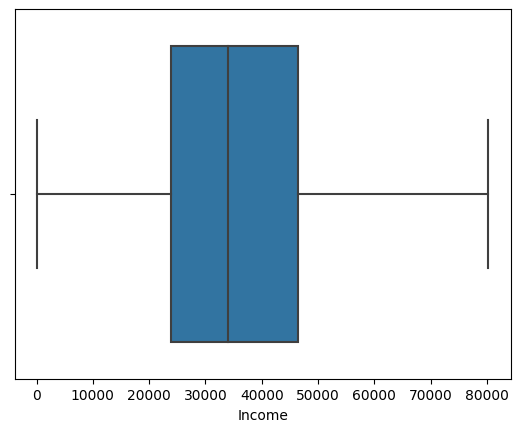

In [25]:
sns.boxplot(data=data, x='Income')

<Axes: xlabel='Population'>

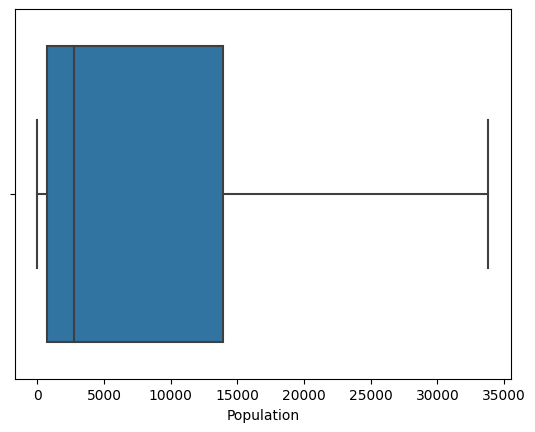

In [26]:
sns.boxplot(data=data, x='Population')

<Axes: xlabel='Children'>

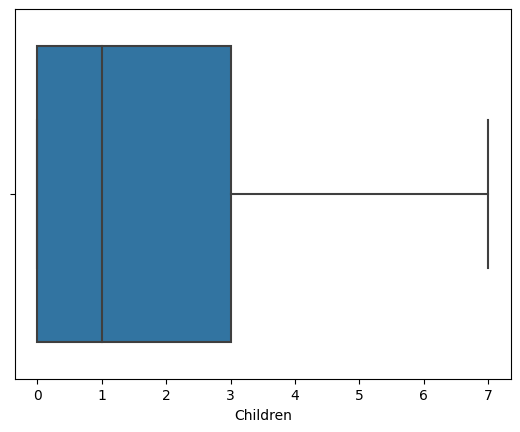

In [27]:
sns.boxplot(data=data, x='Children')

<Axes: xlabel='TotalCharge'>

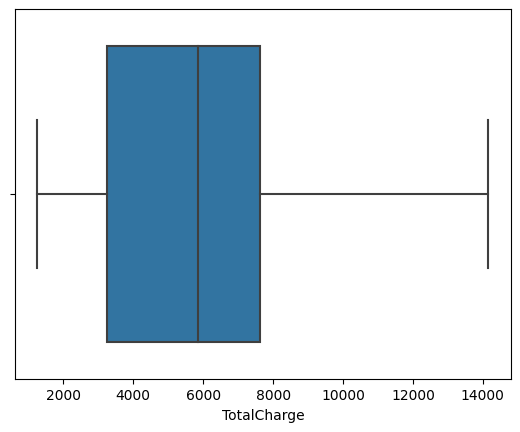

In [28]:
sns.boxplot(data=data, x='TotalCharge')

<Axes: xlabel='Additional_charges'>

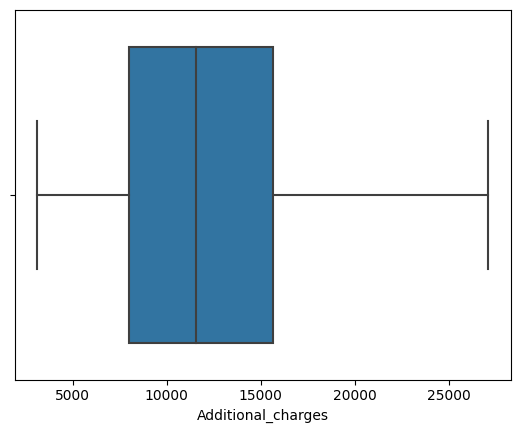

In [29]:
sns.boxplot(data=data, x='Additional_charges')

<Axes: xlabel='VitD_levels'>

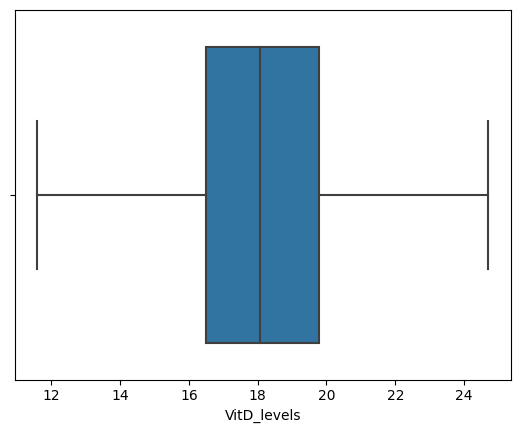

In [30]:
sns.boxplot(data=data, x='VitD_levels')

<Axes: xlabel='VitD_supp'>

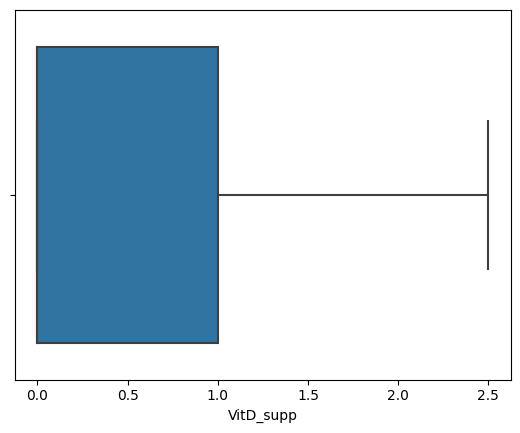

In [31]:
sns.boxplot(data=data, x='VitD_supp')

In [32]:
# export cleaned data to csv file
data.to_csv('med-data-cleaned.csv')

In [33]:
# Load the data from CSV file for PCA analysis
clean_data = pd.read_csv('med-data-cleaned.csv')

In [34]:
# create a dataframe of only continuous data
cont_data = pd.DataFrame(clean_data, columns=['Children', 'TotalCharge', 'Additional_charges', 'Age', 'Full_meals_eaten', 'Doc_visits', 'Initial_days', 'Income', 'VitD_levels', 'VitD_supp', 'Timely_admis', 'Timely_treat', 'Timely_visits', 'Reliability', 'Options', 'Hours_treat', 'Courteous_staff', 'Active_listening'])

In [35]:
scaler = StandardScaler()
 
scaler.fit(cont_data)
 
scaled_cont_data = scaler.transform(cont_data)

pca = PCA(n_components=cont_data.shape[1])
 
pca.fit_transform(scaled_cont_data)

array([[-1.52652107, -1.26680783,  0.15843499, ...,  0.48414967,
        -0.11274388, -0.00896908],
       [-0.36120474, -0.61412472, -0.12475688, ...,  0.55358222,
         0.67440878, -0.01701472],
       [-0.18613674, -1.4756138 , -0.84138681, ...,  0.45017238,
         1.54354841, -0.04231079],
       ...,
       [-1.90108863,  0.0354463 ,  0.17206129, ...,  0.33659484,
        -0.17749461,  0.82876991],
       [ 0.80910263,  1.54031905,  1.14503072, ..., -0.24949592,
        -0.49487822, -0.4990895 ],
       [ 0.61955716,  1.88667743,  0.32532758, ..., -0.22224679,
        -0.47705532, -0.39636178]])

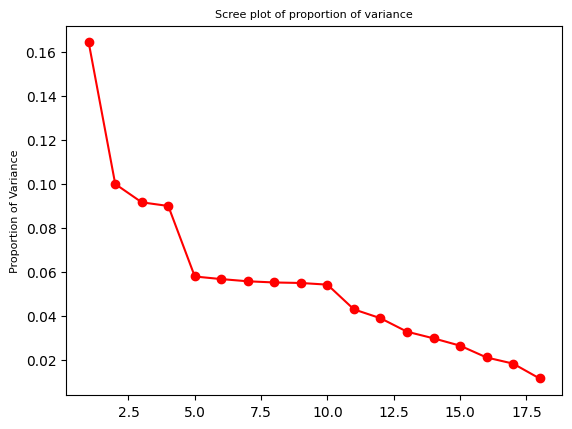

In [36]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Scree plot of proportion of variance', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

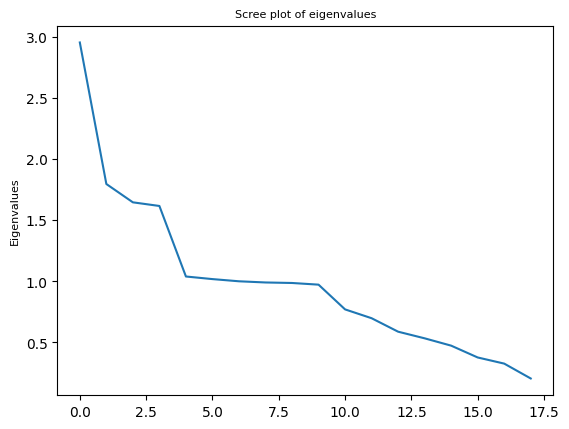

In [37]:
plt.plot(eigenvalues)
plt.title('Scree plot of eigenvalues', fontsize=8)
plt.ylabel('Eigenvalues', fontsize=8)
plt.show()

In [38]:
pca_table = pd.DataFrame(pca.components_.T,
columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PC7', 'PCA8', 'PCA9', 'PCA10',
'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18'],
index=cont_data.columns)
pca_table

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PC7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
Children,0.003503,-0.002598,0.019641,0.008744,-0.019486,-0.106169,0.979885,0.076002,0.131555,0.048828,0.034534,-0.000753,0.013149,-0.014685,-0.022362,-0.008841,-0.001832,0.007823
TotalCharge,-0.020583,0.685955,0.111323,-0.133539,0.022664,0.008884,-0.001763,-0.024071,0.007024,-0.009820,0.003393,0.008644,-0.015601,0.001512,-0.015584,0.046574,-0.005724,0.703363
Additional_charges,0.004232,0.142502,0.003173,0.691871,-0.020672,-0.004678,0.002381,-0.013629,-0.001287,-0.014562,0.005084,-0.010444,0.014477,-0.025937,0.050868,0.701370,0.043075,-0.052406
Age,0.000719,0.138975,0.012754,0.691751,-0.026767,-0.029951,-0.016507,-0.011179,0.008767,-0.019706,-0.004077,0.024885,-0.003173,0.031022,-0.056699,-0.700879,-0.044511,0.038623
Full_meals_eaten,-0.000462,-0.016009,0.019375,0.039895,0.590849,0.137773,0.047527,-0.300466,-0.253510,0.683834,0.058998,0.035970,-0.011060,0.001807,0.015483,-0.010776,0.000572,0.001330
Doc_visits,0.007044,-0.005192,-0.008477,0.014083,-0.117458,0.651543,-0.035716,-0.026950,0.712323,0.223786,-0.014917,0.028462,-0.024958,0.007930,-0.011047,-0.004210,-0.002117,-0.000992
Initial_days,-0.021884,0.575270,0.104869,-0.140698,-0.278261,-0.234073,-0.025438,-0.298998,0.096121,0.213454,-0.013797,0.014246,0.026245,0.009031,0.014111,-0.034271,-0.010873,-0.598388
Income,-0.006953,-0.009187,-0.020498,-0.006146,-0.282258,0.542547,0.174970,-0.539149,-0.468127,-0.281023,-0.075311,-0.002778,-0.009172,-0.000630,0.000025,-0.013833,-0.002120,-0.003091
VitD_levels,-0.008902,0.360005,0.054893,-0.050482,0.488634,0.380618,0.055618,0.439477,-0.134502,-0.350488,0.008024,-0.006039,-0.021935,-0.004616,0.010173,-0.035748,0.020507,-0.376233
VitD_supp,-0.004877,0.042394,0.011699,0.004421,-0.485253,0.217787,-0.001212,0.569770,-0.403925,0.474143,0.040051,-0.024947,0.010310,-0.001906,0.011070,-0.007261,-0.000578,0.001602


In [39]:
# export loading matrix
pca_table.to_csv('med-data-pca.csv')
# based on proportion of variance scree plot, limit to greater than 0.05
threshold_data=pca_table[pca_table.iloc[:,:]>0.05]
# looking at top 5 PC components (covers almost all)
threshold_data.iloc[:, :5]

,PCA1,PCA2,PCA3,PCA4,PCA5
Children,NaN,NaN,NaN,NaN,NaN
TotalCharge,NaN,0.685955,0.111323,NaN,NaN
Additional_charges,NaN,0.142502,NaN,0.691871,NaN
Age,NaN,0.138975,NaN,0.691751,NaN
Full_meals_eaten,NaN,NaN,NaN,NaN,0.590849
Doc_visits,NaN,NaN,NaN,NaN,NaN
Initial_days,NaN,0.575270,0.104869,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN
VitD_levels,NaN,0.360005,0.054893,NaN,0.488634
VitD_supp,NaN,NaN,NaN,NaN,NaN
